In [1]:
#установка CatBoost и других библиотек
!pip install catboost
!pip install seaborn
!pip install sklearn
!pip install imblearn
!pip install xgboost
!pip install tensorflow

In [2]:
# Импортирование нужных библиотек
import gc # сборщик мусора
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, r2_score, roc_auc_score, accuracy_score, confusion_matrix, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.isotonic import IsotonicRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.special import boxcox1p, inv_boxcox, inv_boxcox1p
from sklearn.impute import SimpleImputer
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

import warnings

warnings.filterwarnings('ignore')

C:\Users\iliya\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#Чтение датасета
DATASET = pd.read_csv("sales_dataset.csv")

In [4]:
DATASET

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,...,cnt_unique_plu_12_Теливизоры,cnt_unique_plu_6_Консоли,cnt_unique_plu_6_Теливизоры,cnt_unique_plu_7_Консоли,cnt_unique_plu_7_Теливизоры,cnt_unique_plu_8_Консоли,cnt_unique_plu_8_Теливизоры,cnt_unique_plu_9_Консоли,cnt_unique_plu_9_Теливизоры,is_target_audience
0,0.0,1920.136589,15475.946971,5459.307176,0.000000,32589.890506,19.2,0.000000,0.000000,0.0,...,19.2,6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6.4,3321.800858,127354.955108,0.000000,0.000000,207312.874631,44.8,0.000000,1131.948017,12.8,...,0.0,0.0,12.8,0.0,19.2,0.0,25.6,6.4,6.4,0
2,0.0,839.462069,2632.625207,0.000000,0.000000,9066.598788,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,12.8,0.000000,224279.315391,0.000000,0.000000,54147.483756,44.8,9124.527682,1522.783258,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6.4,5482.105837,57554.149418,0.000000,0.000000,31452.081712,89.6,4244.109065,0.000000,0.0,...,0.0,0.0,12.8,0.0,6.4,0.0,12.8,0.0,12.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,0.0,1254.836430,0.000000,0.000000,0.000000,0.000000,19.2,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
135057,6.4,2573.020401,0.000000,4083.496403,1543.843736,0.000000,19.2,699.722792,0.000000,0.0,...,25.6,0.0,0.0,0.0,0.0,0.0,0.0,12.8,0.0,0
135058,0.0,3281.542968,0.000000,1815.116473,0.000000,0.000000,12.8,0.000000,0.000000,0.0,...,12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
135059,0.0,796.320597,0.000000,0.000000,0.000000,0.000000,12.8,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
#Отделение вектора таргета от основного дата сета
df_X = DATASET.loc[:, DATASET.columns != 'is_target_audience']
df_y = DATASET.loc[:, DATASET.columns == 'is_target_audience']

In [7]:
pd.set_option('display.max_columns', 196)

In [8]:
df_X

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [9]:
df_y

,is_target_audience
0,0
1,0
2,0
3,0
4,0
...,...
135056,0
135057,0
135058,0
135059,0


In [10]:
#Перевод количественных данных к int типу
mas = [6, 7, 8, 9, 10, 11, 12]

for i in mas:
    df_X = df_X.astype({"cnt_checks_" + str(i): int,
                              "cnt_checks_" + str(i) + "_Ноутбуки" : int,
                              "cnt_checks_" + str(i) + "_Теливизоры" : int,
                              "cnt_checks_" + str(i) + "_Комплектующие ПК" : int,
                              "cnt_checks_" + str(i) + "_Колонки и аудио-устройства" : int,
                              "cnt_checks_" + str(i) + "_Консоли" : int,
                              "cnt_checks_" + str(i) + "_Флеш-устройства" : int,
                              "cnt_unique_plu_" + str(i): int,
                              "cnt_unique_plu_" + str(i) + "_Ноутбуки" : int,
                              "cnt_unique_plu_" + str(i) + "_Теливизоры" : int,
                              "cnt_unique_plu_" + str(i) + "_Комплектующие ПК" : int,
                              "cnt_unique_plu_" + str(i) + "_Колонки и аудио-устройства" : int,
                              "cnt_unique_plu_" + str(i) + "_Консоли" : int,
                              "cnt_unique_plu_" + str(i) + "_Флеш-устройства" : int})

In [11]:
df_X

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [12]:
df_X.describe()

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [13]:
#Стандартизация данных
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_X)
df_X_scaled = scaler.transform(df_X)
df_X = pd.DataFrame(df_X_scaled, columns=df_X.columns)

In [14]:
df_X

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [15]:
#Разделение дата сета на тренировочный и тестовый
train_70_X, test_X, train_70_y, test_y = train_test_split(df_X, df_y, test_size=0.3, random_state=42, shuffle = True, stratify = df_y)

In [16]:
train_70_X.shape

(94542, 196)

In [17]:
test_X.shape

(40519, 196)

In [18]:
train_70_y.shape

(94542, 1)

In [19]:
test_y.shape

(40519, 1)

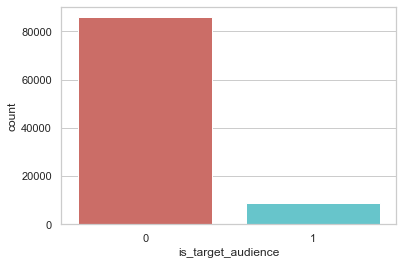

In [20]:
#Соотношение классов в тренировочном датасете

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

class_data = pd.DataFrame(train_70_y['is_target_audience'])

sns.countplot(x='is_target_audience', data = class_data, palette='hls')
plt.show()

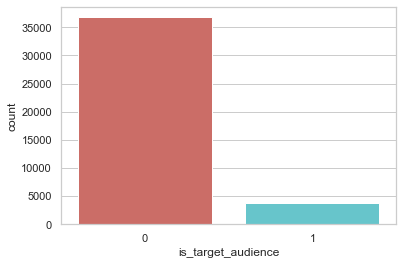

In [21]:
#Соотношение классов в тестовом датасете

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

class_data = pd.DataFrame(test_y['is_target_audience'])

sns.countplot(x='is_target_audience', data = class_data, palette='hls')
plt.show()

In [22]:
train_70_y.sum()

is_target_audience    8693
dtype: int64

In [23]:
train_70_X.describe()

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [24]:
#Downsampling тренировочных данных для балансирования классов

df_train = train_70_X.join(train_70_y)
df_train_zeros = df_train[df_train['is_target_audience'] == 0].sample(8693)
df_train_ones = df_train[df_train['is_target_audience'] == 1]
df_train_downsampled = pd.concat([df_train_zeros,df_train_ones])

X_train_downsampled = df_train_downsampled.drop('is_target_audience', axis=1)
y_train_downsampled = df_train_downsampled['is_target_audience']

In [ ]:
#SMOTE
#sm = SMOTE(random_state = 42, k_neighbors = 5)
#train_X_oversampled, train_y_oversampled = sm.fit_resample(train_X, train_y)

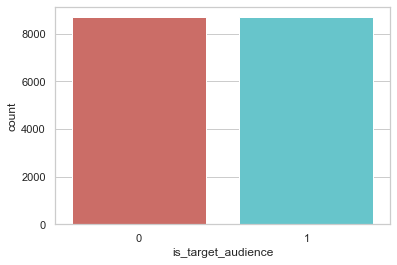

In [26]:
#Сбалансированный тренировочный датасет
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

class_data = pd.DataFrame(y_train_downsampled)

sns.countplot(x='is_target_audience', data = class_data, palette='hls')
plt.show()

In [27]:
X_train_downsampled

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [28]:
y_train_downsampled = pd.DataFrame(y_train_downsampled, columns=['is_target_audience'])

In [29]:
y_train_downsampled

,is_target_audience
114529,0
97015,0
118471,0
76616,0
124469,0
...,...
3056,1
106756,1
78657,1
124117,1


In [30]:
test_X

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [31]:
#разделение тренировочного датасета для того, чтобы обучить модели и сделать тренировочный датасет нейросети, которая будет предсказывать по оценкам разных моделей
n_train_X, n_test_X, n_train_y, n_test_y = train_test_split(X_train_downsampled, y_train_downsampled, test_size=0.3, random_state=42, stratify = y_train_downsampled)

In [32]:
n_train_X

,cnt_checks_10_Ноутбуки,rto_std_11,rto_6,rto_12_Теливизоры,rto_12_Комплектующие ПК,rto_8,cnt_checks_9,rto_9_Ноутбуки,rto_10_Комплектующие ПК,cnt_checks_9_Колонки и аудио-устройства,rto_stddev_6_Колонки и аудио-устройства,rto_12_Ноутбуки,rto_stddev_8_Консоли,rto_12,rto_6_Комплектующие ПК,rto_6_Колонки и аудио-устройства,cnt_checks_11,rto_stddev_7_Комплектующие ПК,rto_stddev_9_Теливизоры,cnt_checks_10_Флеш-устройства,cnt_checks_12_Комплектующие ПК,rto_6_Ноутбуки,rto_stddev_6_Флеш-устройства,cnt_checks_6_Ноутбуки,rto_stddev_6_Ноутбуки,cnt_checks_11_Теливизоры,cnt_checks_12_Флеш-устройства,rto_stddev_10_Комплектующие ПК,cnt_checks_6_Теливизоры,rto_stddev_10_Флеш-устройства,rto_12_Консоли,rto_7_Комплектующие ПК,cnt_checks_12_Колонки и аудио-устройства,rto_stddev_10_Консоли,rto_7_Консоли,rto_7_Флеш-устройства,cnt_checks_10_Комплектующие ПК,rto_9_Колонки и аудио-устройства,cnt_checks_11_Консоли,rto_stddev_11_Консоли,rto_stddev_6_Консоли,rto_stddev_12_Флеш-устройства,cnt_checks_11_Колонки и аудио-устройства,rto_stddev_9_Консоли,rto_11_Консоли,rto_stddev_10_Теливизоры,cnt_checks_12_Ноутбуки,rto_stddev_10_Ноутбуки,rto_stddev_8_Колонки и аудио-устройства,cnt_checks_9_Консоли,rto_10_Теливизоры,rto_stddev_6_Теливизоры,cnt_checks_7_Теливизоры,cnt_checks_6_Комплектующие ПК,cnt_checks_6_Колонки и аудио-устройства,rto_8_Флеш-устройства,cnt_checks_10_Консоли,rto_12_Флеш-устройства,rto_11_Ноутбуки,cnt_checks_12_Консоли,rto_stddev_11_Ноутбуки,rto_stddev_12_Комплектующие ПК,rto_stddev_7_Консоли,cnt_checks_6,cnt_checks_9_Флеш-устройства,cnt_checks_7_Консоли,cnt_checks_8_Комплектующие ПК,rto_11_Комплектующие ПК,rto_stddev_11_Теливизоры,cnt_checks_7_Комплектующие ПК,rto_10_Флеш-устройства,rto_stddev_7_Ноутбуки,rto_9_Теливизоры,rto_10_Ноутбуки,rto_stddev_12_Колонки и аудио-устройства,cnt_checks_7,rto_7_Ноутбуки,cnt_checks_9_Ноутбуки,cnt_checks_7_Ноутбуки,rto_9_Флеш-устройства,rto_stddev_9_Комплектующие ПК,rto_std_9,rto_stddev_10_Колонки и аудио-устройства,rto_stddev_9_Колонки и аудио-устройства,cnt_checks_9_Теливизоры,rto_stddev_6_Комплектующие ПК,rto_10_Колонки и аудио-устройства,rto_12_Колонки и аудио-устройства,rto_10_Консоли,cnt_checks_12,cnt_checks_10_Колонки и аудио-устройства,rto_stddev_9_Флеш-устройства,rto_11_Колонки и аудио-устройства,rto_6_Флеш-устройства,cnt_checks_10,rto_stddev_7_Флеш-устройства,cnt_checks_12_Теливизоры,rto_std_7,cnt_checks_8_Флеш-устройства,rto_stddev_8_Ноутбуки,rto_stddev_11_Флеш-устройства,cnt_checks_7_Флеш-устройства,rto_9_Комплектующие ПК,cnt_checks_6_Консоли,cnt_checks_8_Консоли,cnt_checks_7_Колонки и аудио-устройства,cnt_checks_11_Флеш-устройства,cnt_checks_8_Колонки и аудио-устройства,cnt_checks_11_Ноутбуки,rto_8_Ноутбуки,rto_10,rto_std_8,rto_stddev_11_Комплектующие ПК,rto_stddev_8_Комплектующие ПК,rto_stddev_12_Ноутбуки,rto_6_Теливизоры,rto_7,rto_std_6,cnt_checks_9_Комплектующие ПК,rto_stddev_11_Колонки и аудио-устройства,rto_9,rto_std_10,rto_stddev_8_Теливизоры,rto_8_Комплектующие ПК,rto_11_Флеш-устройства,cnt_checks_11_Комплектующие ПК,rto_7_Колонки и аудио-устройства,cnt_checks_6_Флеш-устройства,rto_9_Консоли,rto_7_Теливизоры,rto_8_Консоли,cnt_checks_8_Ноутбуки,rto_stddev_7_Теливизоры,rto_8_Теливизоры,rto_11,rto_std_12,cnt_checks_10_Теливизоры,rto_stddev_12_Теливизоры,rto_6_Консоли,rto_stddev_7_Колонки и аудио-устройства,rto_stddev_8_Флеш-устройства,rto_8_Колонки и аудио-устройства,rto_11_Теливизоры,cnt_checks_8_Теливизоры,cnt_checks_8,rto_stddev_9_Ноутбуки,rto_stddev_12_Консоли,cnt_unique_plu_6,cnt_unique_plu_7,cnt_unique_plu_8,cnt_unique_plu_9,cnt_unique_plu_10,cnt_unique_plu_11,cnt_unique_plu_12,cnt_unique_plu_10_Ноутбуки,cnt_unique_plu_10_Флеш-устройства,cnt_unique_plu_10_Комплектующие ПК,cnt_unique_plu_10_Колонки и аудио-устройства,cnt_unique_plu_11_Ноутбуки,cnt_unique_plu_11_Флеш-устройства,cnt_unique_plu_11_Комплектующие ПК,cnt_unique_plu_11_Колонки и аудио-устройства,cnt_unique_plu_12_Ноутбуки,cnt_unique_plu_12_Флеш-устройства,cnt_unique_plu_12_Комплектующие ПК,cnt_unique_plu_12_Колонки и аудио-устройс

In [33]:
n_train_y

,is_target_audience
90363,0
61173,1
37086,1
23406,1
102659,0
...,...
11661,1
99199,1
97403,0
88869,0


In [ ]:
#from sklearn.model_selection import GridSearchCV

In [34]:
#Создание моделей

log = LogisticRegression(random_state = 42, C = 0.1, penalty = 'l1', solver = 'liblinear')
xgb = XGBClassifier(random_state = 42, colsample_bytree = 0.8, gamma = 1, max_depth = 4, min_child_weight = 1, subsample = 1.0)
catboost = CatBoostClassifier(silent = True,random_state = 42, iterations = 5000)
forest = RandomForestClassifier(random_state = 42,n_jobs = 4, criterion = 'entropy', max_depth = 8, max_features = 'log2', n_estimators = 400)

In [ ]:
# GridSearch, использованный для подбора гиперпараметров моделей

#param_grid = {
 #       'min_child_weight': [1, 5, 10],
  #      'gamma': [0.5, 1, 1.5, 2, 5],
   #     'subsample': [0.6, 0.8, 1.0],
    #    'colsample_bytree': [0.6, 0.8, 1.0],
     #   'max_depth': [3, 4, 5]
      #  }
#search = GridSearchCV(xgb, param_grid, scoring='precision', n_jobs=-1, cv = 3)
#result = search.fit(X_train_downsampled, y_train_downsampled)
#print('Best Score: %s' % result.best_score_)
#print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6722384330191423
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}


In [35]:
#Цикл для получения и сравнения результатов, которая дают модели
# ЗАПУСКАТЬ НЕ НАДО, ТАК КАК ИСПОЛЬЗУЕМ АНСАМБЛЬ

accuracy = []
recall = []
precision = []
f1_array = []

models = [log,forest,xgb,catboost]

for model in models:
    print(model)
    model.fit(n_train_X, n_train_y)
    #model.fit(X_train_downsampled , y_train_downsampled )
    #model.fit(X_train , y_train)
    #model.fit(X_train_upsampled, y_train_upsampled)
    y_pred = model.predict(test_X)

    print(confusion_matrix(test_y, y_pred))
    accuracy.append(accuracy_score(test_y, y_pred))
    recall.append(recall_score(test_y, y_pred))
    precision.append(precision_score(test_y, y_pred))
    f1_array.append(f1_score(test_y,y_pred))
    
df_score = pd.DataFrame({'models': models, 'accuracy': accuracy, 'recall': recall, 'precision': precision,
                        'f1_score': f1_array})
df_score

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')
[[27505  9289]
 [ 1604  2121]]
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       n_estimators=400, n_jobs=4, random_state=42)
[[24388 12406]
 [ 1182  2543]]
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=False, gamma=1, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=1.0, tree_method=None,
              validate_parameters=None, verbosity=None)
[12:37:47] WARNING: C:/Users/Administrator

,models,accuracy,recall,precision,f1_score
0,"LogisticRegression(C=0.1, penalty='l1', random...",0.731163,0.569396,0.185890,0.280278
1,"(DecisionTreeClassifier(criterion='entropy', m...",0.664651,0.682685,0.170112,0.272357
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.682371,0.651812,0.173416,0.273948
3,<catboost.core.CatBoostClassifier object at 0x...,0.675313,0.680000,0.174726,0.278016


Предсказания с моделей:

In [36]:
log = log.fit(n_train_X, n_train_y)

In [37]:
log_X_train_pred = log.predict_proba(n_test_X)[:,1]

In [38]:
log_X_test_pred = log.predict_proba(test_X)[:,1]

In [39]:
catboost = catboost.fit(n_train_X, n_train_y)

In [40]:
catboost_X_train_pred = catboost.predict_proba(n_test_X)[:,1]

In [41]:
catboost_X_test_pred = catboost.predict_proba(test_X)[:,1]

In [42]:
xgb = xgb.fit(n_train_X, n_train_y)

[12:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
xgb_X_train_pred = xgb.predict_proba(n_test_X)[:,1]

In [44]:
xgb_X_test_pred = xgb.predict_proba(test_X)[:,1]

In [45]:
forest = forest.fit(n_train_X, n_train_y)

In [46]:
forest_X_train_pred = forest.predict_proba(n_test_X)[:,1]

In [47]:
forest_X_test_pred = forest.predict_proba(test_X)[:,1]

Нейросеть:

In [48]:
from tensorflow.keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [49]:
from tensorflow import keras
from tensorflow.keras import layers,metrics
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier

dr = 0.4
neurons = 512

with tensorflow.device('/gpu:0'):
    model = keras.Sequential([ 
        layers.BatchNormalization(input_shape=[196]),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
    #     layers.Dense(128, activation='swish'), 
    #     layers.Dropout(0.5),
    #     layers.BatchNormalization(),
    #     layers.Dense(128, activation='swish'), 
    #     layers.Dropout(0.5),
    #     layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    early_stopping = keras.callbacks.EarlyStopping(
        monitor = 'val_f1',
        mode = 'max',
        patience=20,
        min_delta=0.0001,
        
        restore_best_weights=True,
    )
    model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=keras.losses.BinaryCrossentropy(label_smoothing=1e-3),
                    metrics=[f1],
                    

                )
    history = model.fit(        
        n_train_X, n_train_y,
        validation_data=(test_X, test_y),
        batch_size=256,
        epochs=638,
        callbacks=[early_stopping],
        verbose=1, 
    )

Epoch 1/638
48/48 [==============================] - 7s 100ms/step - loss: 0.8056 - f1: 0.5229 - val_loss: 0.6333 - val_f1: 0.0000e+00
Epoch 2/638
48/48 [==============================] - 5s 95ms/step - loss: 0.7584 - f1: 0.5579 - val_loss: 0.5765 - val_f1: 0.0000e+00
Epoch 3/638
48/48 [==============================] - 5s 104ms/step - loss: 0.7391 - f1: 0.5733 - val_loss: 0.5783 - val_f1: 6.6203e-04
Epoch 4/638
48/48 [==============================] - 5s 112ms/step - loss: 0.7272 - f1: 0.5795 - val_loss: 0.5913 - val_f1: 0.0038
Epoch 5/638
48/48 [==============================] - 5s 95ms/step - loss: 0.7147 - f1: 0.5931 - val_loss: 0.6170 - val_f1: 0.1485
Epoch 6/638
48/48 [==============================] - 5s 105ms/step - loss: 0.7059 - f1: 0.5977 - val_loss: 0.6317 - val_f1: 0.2734
Epoch 7/638
48/48 [==============================] - 5s 98ms/step - loss: 0.6961 - f1: 0.6006 - val_loss: 0.6148 - val_f1: 0.2774
Epoch 8/638
48/48 [==============================] - 6s 130ms/step - loss:

In [50]:
y_pred_preds = model.predict(n_test_X)

y_pred = y_pred_preds.round()

In [51]:
y_pred_preds_test = model.predict(test_X)

y_pred_test = y_pred_preds_test.round()

In [52]:
accuracy = []
recall = []
precision = []
f1_array = []

print(model)
#model.fit(os_data_X,os_data_y)
#model.fit(X_train_downsampled , y_train_downsampled )
#model.fit(X_train , y_train)
#model.fit(X_train_upsampled, y_train_upsampled)

print(confusion_matrix(test_y, y_pred_test))
accuracy.append(accuracy_score(test_y, y_pred_test))
recall.append(recall_score(test_y, y_pred_test))
precision.append(precision_score(test_y, y_pred_test))
f1_array.append(f1_score(test_y,y_pred_test))
    
df_score = pd.DataFrame({'models': model, 'accuracy': accuracy, 'recall': recall, 'precision': precision,
                        'f1_score': f1_array})
df_score

[[28498  8296]
 [ 1647  2078]]


,models,accuracy,recall,precision,f1_score
0,<keras.engine.sequential.Sequential object at ...,0.754609,0.557852,0.200308,0.294773


Создание новых датасетов:

In [53]:
y_pred_preds = pd.DataFrame(y_pred_preds, columns=['PREDICTED PROBA_NEURO'])

In [54]:
log_X_train_pred = pd.DataFrame(log_X_train_pred, columns=['PREDICTED PROBA_LOG'])

In [55]:
catboost_X_train_pred = pd.DataFrame(catboost_X_train_pred, columns=['PREDICTED PROBA_CAT'])

In [56]:
xgb_X_train_pred = pd.DataFrame(xgb_X_train_pred, columns=['PREDICTED PROBA_XGB'])

In [57]:
forest_X_train_pred = pd.DataFrame(forest_X_train_pred, columns=['PREDICTED PROBA_FOREST'])

In [58]:
train_X_last = y_pred_preds.join(log_X_train_pred)

In [59]:
y_pred_preds_test = pd.DataFrame(y_pred_preds_test, columns=['PREDICTED PROBA_NEURO'])

In [60]:
log_X_test_pred = pd.DataFrame(log_X_test_pred, columns=['PREDICTED PROBA_LOG'])

In [61]:
catboost_X_test_pred = pd.DataFrame(catboost_X_test_pred, columns=['PREDICTED PROBA_CAT'])

In [62]:
xgb_X_test_pred = pd.DataFrame(xgb_X_test_pred, columns=['PREDICTED PROBA_XGB'])

In [63]:
forest_X_test_pred = pd.DataFrame(forest_X_test_pred, columns=['PREDICTED PROBA_FOREST'])

In [64]:
test_X_last = y_pred_preds_test.join(log_X_test_pred)

In [65]:
train_X_last

,PREDICTED PROBA_NEURO,PREDICTED PROBA_LOG
0,0.498881,0.455049
1,0.170916,0.315463
2,0.318529,0.332081
3,0.217551,0.331119
4,0.263621,0.375797
...,...,...
5211,0.412912,0.444230
5212,0.327943,0.357738
5213,0.528729,0.562097
5214,0.563421,0.457930


In [66]:
datasets = [catboost_X_train_pred,xgb_X_train_pred,forest_X_train_pred]

for ds in datasets:
    train_X_last = train_X_last.join(ds)

In [67]:
train_X_last

,PREDICTED PROBA_NEURO,PREDICTED PROBA_LOG,PREDICTED PROBA_CAT,PREDICTED PROBA_XGB,PREDICTED PROBA_FOREST
0,0.498881,0.455049,0.541387,0.562533,0.509847
1,0.170916,0.315463,0.141374,0.151441,0.187266
2,0.318529,0.332081,0.234354,0.244452,0.303757
3,0.217551,0.331119,0.199691,0.213443,0.239547
4,0.263621,0.375797,0.288377,0.286977,0.259505
...,...,...,...,...,...
5211,0.412912,0.444230,0.495585,0.420148,0.460058
5212,0.327943,0.357738,0.385694,0.532213,0.375665
5213,0.528729,0.562097,0.693268,0.774355,0.596912
5214,0.563421,0.457930,0.600844,0.557388,0.496617


In [68]:
test_X_last

,PREDICTED PROBA_NEURO,PREDICTED PROBA_LOG
0,0.635788,0.497481
1,0.376765,0.508834
2,0.662658,0.720233
3,0.496999,0.665876
4,0.740717,0.865508
...,...,...
40514,0.517874,0.464730
40515,0.670535,0.692294
40516,0.624425,0.541702
40517,0.481432,0.453677


In [69]:
datasets = [catboost_X_test_pred,xgb_X_test_pred,forest_X_test_pred]

for ds in datasets:
    test_X_last = test_X_last.join(ds)

In [70]:
test_X_last

,PREDICTED PROBA_NEURO,PREDICTED PROBA_LOG,PREDICTED PROBA_CAT,PREDICTED PROBA_XGB,PREDICTED PROBA_FOREST
0,0.635788,0.497481,0.720749,0.875810,0.603809
1,0.376765,0.508834,0.311920,0.254809,0.514525
2,0.662658,0.720233,0.802796,0.808813,0.708918
3,0.496999,0.665876,0.872809,0.980852,0.693704
4,0.740717,0.865508,0.818930,0.957090,0.784548
...,...,...,...,...,...
40514,0.517874,0.464730,0.600086,0.653209,0.518878
40515,0.670535,0.692294,0.806937,0.838389,0.752854
40516,0.624425,0.541702,0.737948,0.860444,0.583875
40517,0.481432,0.453677,0.511870,0.509588,0.589180


In [71]:
n_test_y

,is_target_audience
78669,0
37013,1
84990,0
3533,0
8863,0
...,...
81064,0
21241,1
11310,0
35402,1


Нейросеть, использующая данные с других моделей для предсказания класса:

In [72]:
dr = 0.4
neurons = 512

with tensorflow.device('/gpu:0'):
    model = keras.Sequential([ 
        layers.BatchNormalization(input_shape=[5]),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
        layers.Dense(neurons, activation='swish'),
        layers.Dropout(dr),
        layers.BatchNormalization(),
    #     layers.Dense(128, activation='swish'), 
    #     layers.Dropout(0.5),
    #     layers.BatchNormalization(),
    #     layers.Dense(128, activation='swish'), 
    #     layers.Dropout(0.5),
    #     layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    early_stopping = keras.callbacks.EarlyStopping(
        monitor = 'val_f1',
        mode = 'max',
        patience=20,
        min_delta=0.0001,
        
        restore_best_weights=True,
    )
    model.compile(
                    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss=keras.losses.BinaryCrossentropy(label_smoothing=1e-3),
                    metrics=[f1],
                    

                )
    history = model.fit(        
        train_X_last, n_test_y,
        validation_data=(test_X_last, test_y),
        batch_size=256,
        epochs=638,
        callbacks=[early_stopping],
        verbose=1, # hide the output because we have so many epochs
    )

Epoch 1/638
21/21 [==============================] - 4s 143ms/step - loss: 0.8126 - f1: 0.5243 - val_loss: 0.6730 - val_f1: 0.0000e+00
Epoch 2/638
21/21 [==============================] - 3s 131ms/step - loss: 0.7568 - f1: 0.5766 - val_loss: 0.6550 - val_f1: 0.0000e+00
Epoch 3/638
21/21 [==============================] - 3s 131ms/step - loss: 0.7314 - f1: 0.5981 - val_loss: 0.6457 - val_f1: 0.0000e+00
Epoch 4/638
21/21 [==============================] - 3s 130ms/step - loss: 0.7247 - f1: 0.6046 - val_loss: 0.6307 - val_f1: 0.0000e+00
Epoch 5/638
21/21 [==============================] - 3s 130ms/step - loss: 0.7243 - f1: 0.5961 - val_loss: 0.6327 - val_f1: 0.0000e+00
Epoch 6/638
21/21 [==============================] - 3s 136ms/step - loss: 0.7147 - f1: 0.6082 - val_loss: 0.6405 - val_f1: 0.0000e+00
Epoch 7/638
21/21 [==============================] - 3s 135ms/step - loss: 0.7123 - f1: 0.6075 - val_loss: 0.6382 - val_f1: 0.0000e+00
Epoch 8/638
21/21 [==============================] - 3s

In [ ]:
ensemble_y_predicts = model.predict(test_X_last)

ensemble_y_class = ensemble_y_predicts.round()

In [83]:
print(confusion_matrix(test_y, ensemble_y_class))
print('Accuracy:', accuracy_score(test_y, ensemble_y_class))
print('Recall:', recall_score(test_y, ensemble_y_class))
print('Precision:', precision_score(test_y, ensemble_y_class))
print('f1_score:', f1_score(test_y,ensemble_y_class))

[[30853  5941]
 [ 1990  1735]]
Accuracy: 0.8042646659591797
Recall: 0.4657718120805369
Precision: 0.22602918186555498
f1_score: 0.30435926673098856


In [84]:
ensemble_y_predicts = pd.DataFrame(ensemble_y_predicts, columns=['PREDICTED PROBABILITY'])

In [85]:
ensemble_y_predicts.to_csv("ensemble_y_predicts111.csv", index=False)